In [2]:
import pandas as pd

# Load the labeled dataset
df = pd.read_csv("Processed_Reviews (assigned).csv")
df.head()


,Review,lowercased,urls_removed,html_removed,emojis_removed,slangs_replaced,contractions_replaced,punctuations_removed,numbers_removed,spelling_corrected,stopwords_removed,stemmed_words,lemmatized,tokenized,Label
0,The product arrived on time. Packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,product arrived time packaging great quality a...,product arriv time packag great qualiti amaz,product arrive time packaging great quality am...,"['product', 'arrive', 'time', 'packaging', 'gr...",1
1,THIS PRODUCT IS JUST AMAZING! I LOVE IT.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing i love it,this product is just amazing i love it,this product is just amazing i love it,product amazing love,product amaz love,product amaze love,"['product', 'amaze', 'love']",1
2,"I bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...",i bought this phone for 799 and it has a 120hz...,i bought this phone for and it has a hz displ...,i bought this phone for and it has a hz displ...,bought phone hz display totally worth,bought phone hz display total worth,buy phone hz display totally worth,"['buy', 'phone', 'hz', 'display', 'totally', '...",1
3,Wow!!! This product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow product awesome bit expensive,wow product awesom bit expens,wow product awesome bit expensive,"['wow', 'product', 'awesome', 'bit', 'expensive']",0
4,The laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine,the laptop works perfectly fine,the laptop works perfectly fine,laptop works perfectly fine,laptop work perfectli fine,laptop work perfectly fine,"['laptop', 'work', 'perfectly', 'fine']",1


In [4]:
# Use only lemmatized column for text and label column
texts = df['lemmatized']
labels = df['Label']

# If label is not numeric already, convert (skip if already 0/1)
labels = labels.map({'negative': 0, 'positive': 1}) if labels.dtype == 'O' else labels


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(texts)
y = labels


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train Naive Bayes
nb_model = MultinomialNB().fit(X_train, y_train)

# Train SVM
svm_model = SVC(kernel='linear').fit(X_train, y_train)


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Naive Bayes Evaluation
nb_pred = nb_model.predict(X_test)
nb_report = classification_report(y_test, nb_pred)
nb_acc = accuracy_score(y_test, nb_pred)
nb_cm = confusion_matrix(y_test, nb_pred)


# SVM Evaluation
svm_pred = svm_model.predict(X_test)
svm_report = classification_report(y_test, svm_pred)
svm_acc = accuracy_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

#the data is too small cause the error below

C:\Users\isham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\isham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


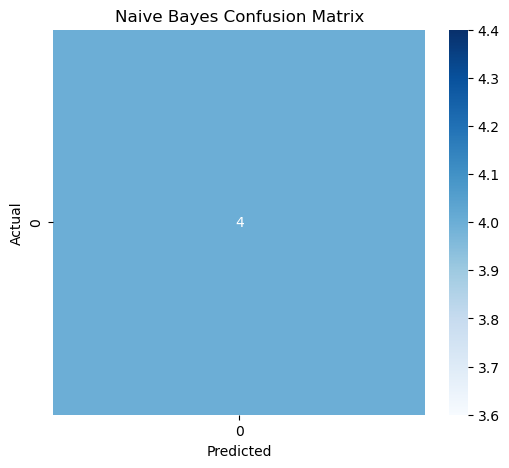

Naive Bayes Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Naive Bayes Accuracy: 1.00
Naive Bayes Confusion Matrix:
[[4]]


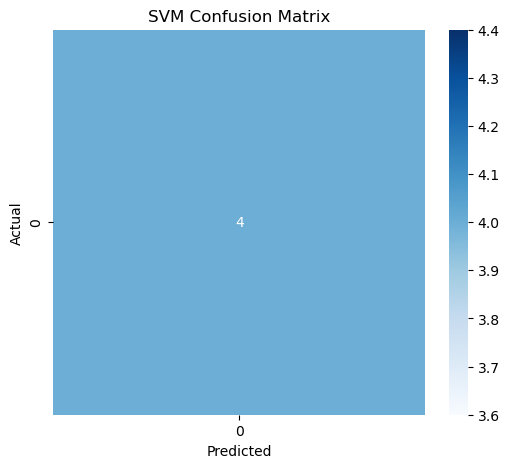


SVM Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

SVM Accuracy: 1.00
SVM Confusion Matrix:
[[4]]


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(nb_cm, "Naive Bayes Confusion Matrix")

print("Naive Bayes Report:")
print(nb_report)
print(f"Naive Bayes Accuracy: {nb_acc:.2f}")
print("Naive Bayes Confusion Matrix:")
print(nb_cm)

plot_confusion_matrix(svm_cm, "SVM Confusion Matrix")

print("\nSVM Report:")
print(svm_report)
print(f"SVM Accuracy: {svm_acc:.2f}")
print("SVM Confusion Matrix:")
print(svm_cm)
